In [31]:
import numpy as np
import pandas as pd
import exploratory_data_analysis.eda_functions as eda

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Function tht display the splits of the tree,
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


In [3]:
location = '~/Scripts/DS/MachineLearning/data/churnModeling.csv'

In [ ]:
df = pd.read_csv(location)

In [ ]:
## looking at the first 5 examples
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [ ]:
eda.get_invalid_values(df)

,nulls,invalids,unique_item
CreditScore,0,0,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
Age,0,0,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
Tenure,0,0,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
Balance,0,0,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
NumOfProducts,0,0,"[1, 3, 2, 4]"
HasCrCard,0,0,"[1, 0]"
IsActiveMember,0,0,"[1, 0]"
EstimatedSalary,0,0,"[101348.88, 112542.58, 113931.57, 93826.63, 79..."
Exited,0,0,"[1, 0]"
Loyalty,0,0,"[0.0476190476190476, 0.024390243902439, 0.1904..."


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
## AVG balance of customers who churned

df[df['Exited'] == 1]['Balance'].mean()

91108.53933726063

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Loyalty            10000 non-null  float64
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Loyalty',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
x_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Loyalty',
       'Geography_Germany', 'Geography_Spain']

In [ ]:
## Split data
y = df['Exited']
X = df[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
## Intatiate the model 
dtree = DecisionTreeClassifier(random_state=0)

## Fit the model to training data
dtree.fit(X_train, y_train)

## Making predictions
pred = dtree.predict(X_test)

In [48]:
## Metrics

print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1991
           1       0.51      0.51      0.51       509

    accuracy                           0.80      2500
   macro avg       0.70      0.69      0.69      2500
weighted avg       0.80      0.80      0.80      2500



In [43]:
## Metrics different way

def get_scores2(y_test, predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = metrics.f1_score(y_test, pred)

    scores = [
        accuracy, 
        precision, 
        recall, 
        f1,
    ]

    columns = [
        'accuracy', 
        'precision', 
        'recall', 
        'f1',
    ]

    scor = pd.DataFrame([scores], columns=columns).T
    scor.columns = ['scores']
    return scor

get_scores2(y_test, pred)

,scores
accuracy,0.802400
precision,0.514851
recall,0.510806
f1,0.512821


In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

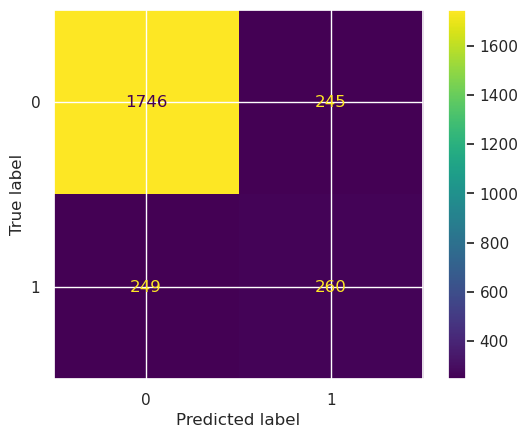

In [30]:
conf_matrix_plot(dtree, X_test , y_test)

### notes

It appears slightly more likely to predict a false positive than a false negative but it's generally balanced. This is reflected in the precision and recall scores both being very close to each other.

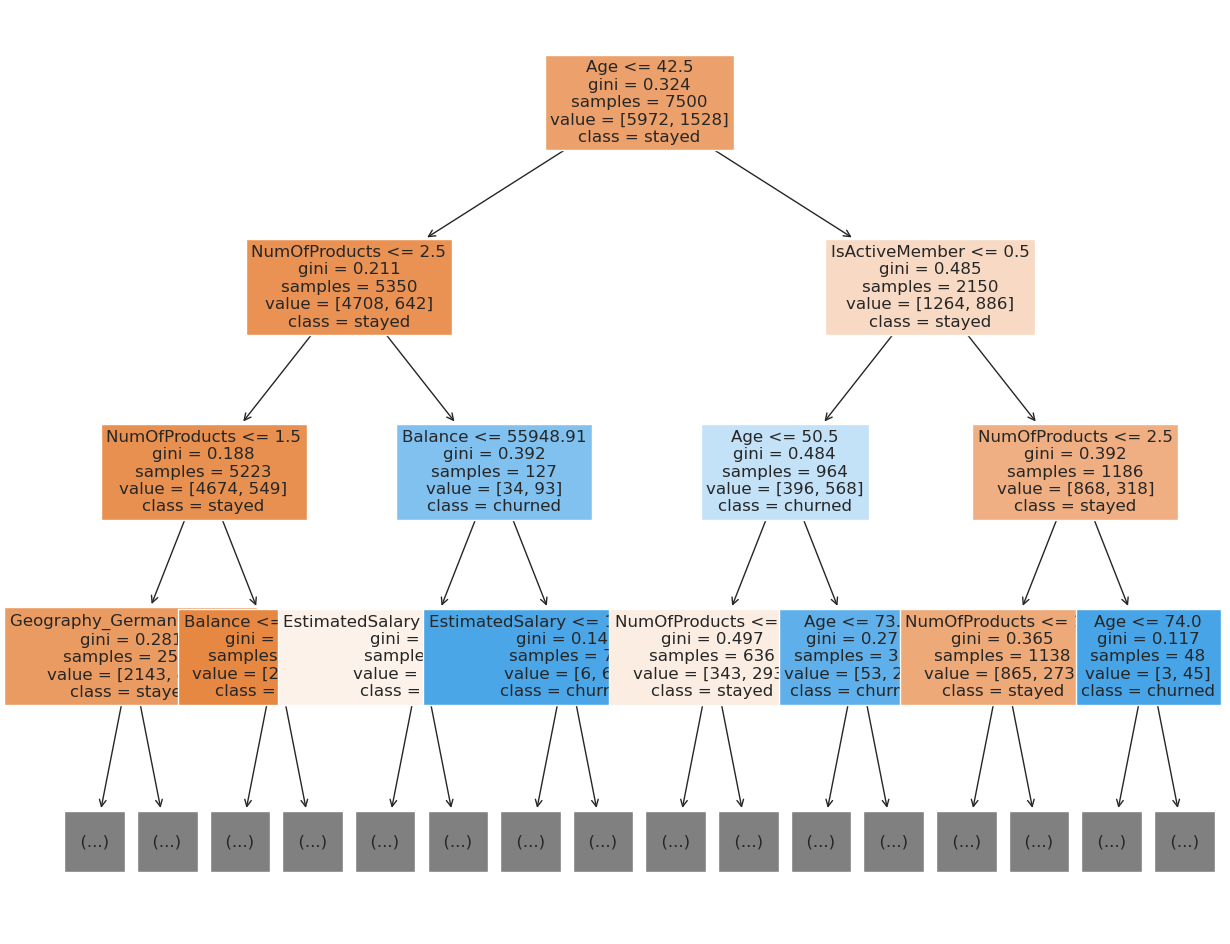

In [50]:
# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(dtree, max_depth=3, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()